# Synchronization of Maps

In [ ]:
using Plots

In [1]:
default(size=(500, 200))

$$
    x_{n+1} = r x_n (1-x_n)
$$

In [11]:
f(x, r) = r * x * (1 - x)

function logistic_hist(x0::Float64, r::Float64, nsteps::Int64)
    hist = zeros(nsteps, 1)
    xn = x0
    hist[begin] = xn
    for n=2:nsteps
        hist[n] = f(xn, r)
    end
    return hist
end

logistic_hist (generic function with 2 methods)

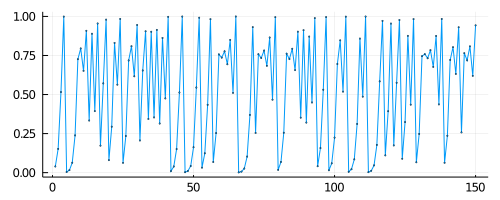

In [17]:
r = 4
zn = 0.01
lhist1 = logistic_hist(zn, r, 150)

plot(hist, marker=true, markersize=1, label=false)

## Master-slave configuration

In [167]:
function master_slave(z0, K, r, nsteps, δξ=1e-5)
    xn = z0
    ξn = z0 + δξ
    
    hist = zeros(nsteps, 2)
    hist[begin, :] = [xn ξn]
    for n=2:nsteps
        # master
        xn = f(xn, r)
        # slave
        ξn = f(ξn, r) - K * (f(ξn, r) - f(xn, r))
        
        hist[n,:] = [xn ξn]
    end
    return hist
end

master_slave (generic function with 2 methods)

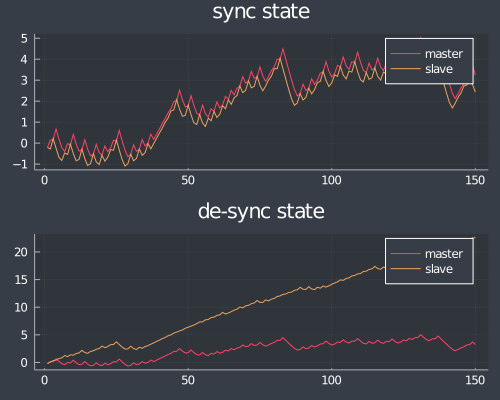

In [169]:
δξ = 1e-5
zn = 0.3
r = 4.0
nsteps = 150

K1, K2 = 3/2 - 0.1, 0.2
hist1 = master_slave(zn, K1, r, nsteps)
hist2 = master_slave(zn, K2, r, nsteps)


l = @layout[a;b]
p1 = plot(cumsum(hist1 .- 0.5, dims=1), title="sync state", label=["master" "slave"])
p2 = plot(cumsum(hist2 .- 0.5, dims=1), title="de-sync state", label=["master" "slave"])
plot(p1, p2, layout=l, size=(500, 400))

┌ Info: Saved animation to 
│   fn = /Users/gerardoduran/Documents/repos/QMUL/MTH743P-complex-systems/assignments/tmp.gif
└ @ Plots /Users/gerardoduran/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/Users/gerardoduran/Documents/repos/QMUL/MTH743P-complex-systems/assignments/tmp.gif")
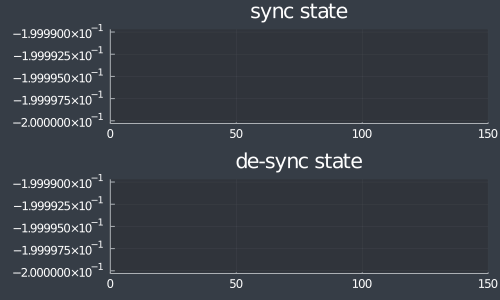

In [172]:
l = @layout[a;b]
@gif for t=1:nsteps
    l = @layout[a; b]
    p1 = plot(cumsum(hist1[begin:t, :] .- 0.5, dims=1),
              title="sync state", label=nothing)
    xlims!(0, nsteps)
    p2 = plot(cumsum(hist2[begin:t, :] .- 0.5, dims=1),
              title="de-sync state", label=nothing)
    xlims!(0, nsteps)
    plot(p1, p2, layout=l, size=(500, 300))
end